In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.csv')

In [4]:
ratings = pd.read_csv('ratings.csv')

In [15]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [18]:
dataset = ratings.merge(movies,on='movieId',how='left')
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [73]:
#Check the userid = 1 ratings there are 20!
dataset[dataset['userId']==1].head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [42]:
pd.DataFrame(dataset.groupby('title')['rating'].mean().sort_values(ascending = False)).head()

,rating
title,
Burn Up! (1991),5.0
Absolute Giganten (1999),5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972),5.0
Erik the Viking (1989),5.0
Reality (2014),5.0


In [51]:
pd.DataFrame(dataset.groupby('title')['rating'].count().sort_values(ascending=False))

,rating
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291
...,...
Once a Thief (Zong heng si hai) (1991),1
Dream Home (Wai dor lei ah yut ho) (2010),1
Drained (O cheiro do Ralo) (2006),1


In [76]:
dataset_1 = pd.DataFrame(dataset.groupby('title')['rating'].mean())
dataset_1['number_of_ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())
dataset_1

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [77]:
dataset_1['number_of_ratings'].max()

341

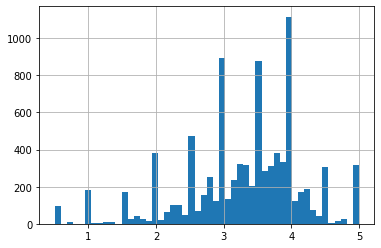

In [78]:
dataset_1['rating'].hist(bins=50)

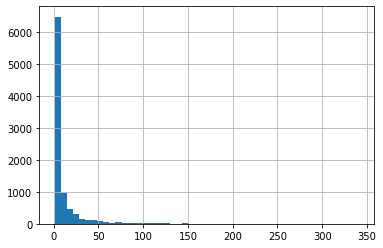

In [79]:
dataset_1['number_of_ratings'].hist(bins=50)

### Recommendation system!

In [80]:
movie_pivot = dataset.pivot_table(index ='userId',columns='title',values='rating')
movie_pivot.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
dataset_1.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [105]:
user_rating = movie_pivot['Star Wars: Episode VII - The Force Awakens (2015)']
user_rating

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
667   NaN
668   NaN
669   NaN
670   NaN
671   NaN
Name: Star Wars: Episode VII - The Force Awakens (2015), Length: 671, dtype: float64